In [2]:
import scanpy as sc
%reload_ext autoreload
%autoreload 2


In [3]:
from utils import *

In [4]:
import scanpy as sc

In [5]:
ad = sc.read_h5ad('../data/integrated/morse_n_adams_n_bal_scvi_patient.id_138341_400_revision.h5ad')

Based on new annotations provided by Oliver, we update the mdm.type annotation

In [6]:
ad.obs

,GSM,sample.id,n_counts,log_counts,n_genes,mt_frac,patient.id,cell.type,study,disease.status,...,Diagnosis,COVID-19,Tissue Type,Cell Population,Cell Type,leiden,No of UMIs,No of genes,% of mito genes,Cluster
SC154IPFUP_AAACCTGCATCACGAT-1-0-0-0-0-0-0,GSM3660658,SC154IPFUP,15616.0,9.656052,2600.0,0.093558,SC154,SPP1hi Macrophage,morse,IPF,...,nan,nan,nan,nan,nan,NaN,NaN,NaN,NaN,nan
SC154IPFUP_AAACGGGGTACCGGCT-1-0-0-0-0-0-0,GSM3660658,SC154IPFUP,9768.0,9.186867,2008.0,0.084562,SC154,SPP1hi Macrophage,morse,IPF,...,nan,nan,nan,nan,nan,NaN,NaN,NaN,NaN,nan
SC154IPFUP_AAACGGGTCTGTCCGT-1-0-0-0-0-0-0,GSM3660658,SC154IPFUP,27659.0,10.227707,3509.0,0.043386,SC154,FABP4hi Macrophage,morse,IPF,...,nan,nan,nan,nan,nan,NaN,NaN,NaN,NaN,nan
SC154IPFUP_AAAGATGAGATCCCGC-1-0-0-0-0-0-0,GSM3660658,SC154IPFUP,9778.0,9.187890,2276.0,0.070157,SC154,SPP1hi Macrophage,morse,IPF,...,nan,nan,nan,nan,nan,NaN,NaN,NaN,NaN,nan
SC154IPFUP_AAAGATGAGATGCGAC-1-0-0-0-0-0-0,GSM3660658,SC154IPFUP,8610.0,9.060679,1981.0,0.059582,SC154,SPP1hi Macrophage,morse,IPF,...,nan,nan,nan,nan,nan,NaN,NaN,NaN,NaN,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484C_TTGACTTTCATCTGCC-1-0-0-1,nan,nan,16249.0,9.695786,3934.0,0.044187,484C,Macrophage_Outlier_D,adams,control,...,nan,nan,nan,nan,nan,NaN,NaN,NaN,NaN,nan
484C_TTTACTGCAAATTGCC-1-0-0-1,nan,nan,1851.0,7.523481,1096.0,0.044300,484C,Macrophage,adams,control,...,nan,nan,nan,nan,nan,NaN,NaN,NaN,NaN,nan
484C_TTTATGCCAATAGAGT-1-0-0-1,nan,nan,11975.0,9.390576,3415.0,0.046180,484C,Macrophage,adams,control,...,nan,nan,nan,nan,nan,NaN,NaN,NaN,NaN,nan
484C_TTTATGCTCGATAGAA-1-0-0-1,nan,nan,6138.0,8.722254,2506.0,0.061584,484C,Macrophage,adams,control,...,nan,nan,nan,nan,nan,NaN,NaN,NaN,NaN,nan


In [7]:
ad.obs['disease.status'].value_counts()

control     39409
IPF         38460
COPD        30159
covid       22810
BAL (NA)     7503
Name: disease.status, dtype: int64

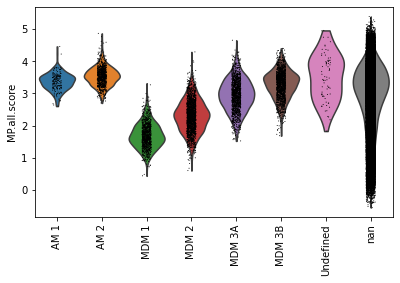

In [8]:
sc.pl.violin(ad, 'MP.all.score', groupby='mdm.type', rotation=90) # , hue='mdm.type'

In [9]:
ad.obs['study'].value_counts()

adams       90477
budinger    22810
morse       17551
BAL          7503
Name: study, dtype: int64

In [10]:
ad.shape

(138341, 17656)

### add the mdm annotation

In [11]:
bal = get_bal()

bal
True ../data/bal/bal.h5ad
True ../data/bal/bal.h5ad


/mnt/znas/icb_zstore01/groups/ml01/workspace/ignacio.ibarra/theislab/saliba_macrophages/notebooks/utils.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  bal.obs['patient.id'] = bal.obs['patient']
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/mnt/znas/icb_zstore01/groups/ml01/workspace/ignacio.ibarra/theislab/saliba_macrophages/notebooks/utils.py:105: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  bal.obs[

adding annotation from bal mdm...
scoring genes...
scoring MP.markers 20
scoring MP.others 10
scoring MP.all 31


In [12]:
bal.obs.index

Index(['AAACCCACAAGCAATA-2', 'AAAGAACGTGTCCGTG-2', 'AAAGGGCCAAGCGCAA-2',
       'AAAGGGCCAGCGAGTA-2', 'AAAGGTACACGGTGTC-2', 'AAAGTCCCAAGGCCTC-2',
       'AAAGTCCCACATACTG-2', 'AAAGTCCTCCTCAGGG-2', 'AAAGTCCTCTTGAGCA-2',
       'AAAGTGAGTTACCCTC-2',
       ...
       'TTCCTAAAGTGCTCAT-8', 'TTCCTCTCATCAGTCA-8', 'TTGATGGAGTTGCTGT-8',
       'TTGCCTGAGCAACAAT-8', 'TTGGATGTCAACCGAT-8', 'TTGGGATCAGCTACTA-8',
       'TTTGACTAGGTTCTTG-8', 'TTTGGTTCAAGTGCTT-8', 'TTTGTTGCAATGAGCG-8',
       'TTTGTTGGTAGTAAGT-8'],
      dtype='object', length=7503)

In [14]:
bal_mdm = sc.read_h5ad('../data/bal/bal_mdm.h5ad')
bal.obs['mdm.type'] = bal.obs.index.map(bal_mdm.obs.Cluster.to_dict())
bal.obs['mdm.type'].value_counts()

MDM 2        2006
MDM 3B       1518
MDM 3A       1426
MDM 1        1023
AM 2          929
AM 1          168
Undefined      75
Name: mdm.type, dtype: int64

In [16]:
# here we update the annotation based on labels that Oliver provided on 03.15.2021
annot_new = pd.read_csv('../data/BAL-Mac_labels.csv', index_col=0)
annot_new['found'] = annot_new.index.isin(bal.obs.index)

bal.obs['mdm.type'] = bal.obs.index.map(annot_new['x'].to_dict())
annot_new['x'].value_counts()

2 Mono/Mp          3002
3 SPP1/LGMN-Mp     1274
5 INHBA-AMp        1064
1 FCN1-Mono        1027
4 SPP1/TREM2-Mp     866
6 Prolif. AMp       207
Low quality         148
Name: x, dtype: int64

In [17]:
bal.obs['mdm.type'].value_counts()

2 Mono/Mp          2951
3 SPP1/LGMN-Mp     1190
1 FCN1-Mono         992
5 INHBA-AMp         916
4 SPP1/TREM2-Mp     819
6 Prolif. AMp       175
Low quality         102
Name: mdm.type, dtype: int64

In [18]:
np.bincount(annot_new.index.isin(bal.obs.index))

array([ 443, 7145])

In [19]:
bal.shape

(7503, 27007)

In [20]:
bal.obs['mdm.type'] = np.where(pd.isnull(bal.obs['mdm.type']), 'Others (COVID)', bal.obs['mdm.type'])
bal.obs['mdm.type'].value_counts()


2 Mono/Mp          2951
3 SPP1/LGMN-Mp     1190
1 FCN1-Mono         992
5 INHBA-AMp         916
4 SPP1/TREM2-Mp     819
Others (COVID)      358
6 Prolif. AMp       175
Low quality         102
Name: mdm.type, dtype: int64

In [21]:
ad.obs['mdm.type'] = np.where(ad.obs['study'] == 'BAL', ad.obs.index.str[:-10].map(bal.obs['mdm.type'].to_dict()), 'Others (COVID)')
ad.obs['mdm.type'] = np.where(ad.obs['study'] != 'BAL', 'Others (A/M/B)', ad.obs['mdm.type'])
# bal.obs['mdm.type'] = np.where(pd.isnull(bal.obs['mdm.type']), 'Others (COVID)', bal.obs['mdm.type'])
# ad.obs['mdm.type'] = np.where(ad.obs['study'] == 'BAL', ad.obs.index.str[:-4].map(bal.obs['mdm.type'].to_dict()), 'Others (Adams/Morse)')

In [22]:
ad.obs['mdm.type'].value_counts()

Others (A/M/B)     130838
2 Mono/Mp            2951
3 SPP1/LGMN-Mp       1190
1 FCN1-Mono           992
5 INHBA-AMp           916
4 SPP1/TREM2-Mp       819
Others (COVID)        358
6 Prolif. AMp         175
Low quality           102
Name: mdm.type, dtype: int64

In [23]:
print('loaded...')

loaded...


In [24]:
ad.obs[ad.obs['study'] == 'morse'][['sample.id', 'study', 'patient.id', 'disease.status']].drop_duplicates('patient.id').sort_values('disease.status') # ['patient.id'].value_counts().head(20)

,sample.id,study,patient.id,disease.status
SC154IPFUP_AAACCTGCATCACGAT-1-0-0-0-0-0-0,SC154IPFUP,morse,SC154,IPF
SC93IPFLOW_AAACCTGCAGGTCCAC-1-0-0-0-0-0-0,SC93IPFLOW,morse,SC93,IPF
SC94IPFUP_AAACCTGAGTAGCCGA-1-0-0-0-0-0-0,SC94IPFUP,morse,SC94,IPF
SC95IPFLOW_AAAGCAAGTACAGTTC-1-0-0-0-0-0-0,SC95IPFLOW,morse,SC95,IPF
SC153IPFLOW_AAACCTGTCGAACGGA-1-0-0-0-0-0-0,SC153IPFLOW,morse,SC153,IPF
SC87IPFLOW_AAACCTGAGAGCTGGT-1-0-0-0-0-0-0,SC87IPFLOW,morse,SC87,IPF
SC89IPFLOW_AAACCTGCAAGTCATC-1-0-0-0-0-0-0,SC89IPFLOW,morse,SC89,IPF
SC88IPFUP_AAACCTGGTATGAATG-1-0-0-0-0-0-0,SC88IPFUP,morse,SC88,IPF
SC56NOR_AAACCTGCACGGTAGA-1-0-0-0-0-0-0,SC56NOR,morse,SC56,control
SC155NORLOW_AAACCTGAGACAAGCC-1-0-0-0-0-0-0,SC155NORLOW,morse,SC155,control


In [25]:
# ad.var[ad.var['ensembl-0-0'].str.contains('ENSG00000095970')]

### add the mdm annotation

In [26]:
ad.obs['cell.type'].value_counts()

Macrophage_Alveolar                36666
Macrophage                         32089
SPP1hi Macrophage                  10593
M2                                 10453
M3                                  8845
Macrophages                         7503
FABP4hi Macrophage                  6958
Macrophage_Outlier_B                4223
Macrophage_MT-tRNAs                 2077
Macrophage_Outlier_C                2068
nocytes                             1968
Macrophage_Outlier_A                1690
Macrophage_Outlier_F                1688
Macrophage_Alveolar_CellCycle_A     1472
Macrophage_Alveolar_CellCycle_B     1398
Macrophage_Alveolar_Outlier_A       1263
Macrophage_Alveolar_Outlier_B       1219
Macrophage_CellCycle_B              1163
1                                   1030
Macrophage_Outlier_D                 959
Macrophage_Outlier_HSPs              915
Macrophage_Alveolar_Outlier_D        376
Macrophage_Alveolar_Outlier_C        364
Macrophage_CellCycle_A               343
2               

In [27]:
ad.obs['mdm.type'].value_counts()

Others (A/M/B)     130838
2 Mono/Mp            2951
3 SPP1/LGMN-Mp       1190
1 FCN1-Mono           992
5 INHBA-AMp           916
4 SPP1/TREM2-Mp       819
Others (COVID)        358
6 Prolif. AMp         175
Low quality           102
Name: mdm.type, dtype: int64

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [29]:
bal = ad[ad.obs['study'] == 'BAL',:]

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Alveolar-Mac'),
  Text(1, 0, 'B/DC'),
  Text(2, 0, 'Epithelia'),
  Text(3, 0, 'Mo-Mac'),
  Text(4, 0, 'Neutrophil'),
  Text(5, 0, 'Plasmablast'),
  Text(6, 0, 'T/NK')])

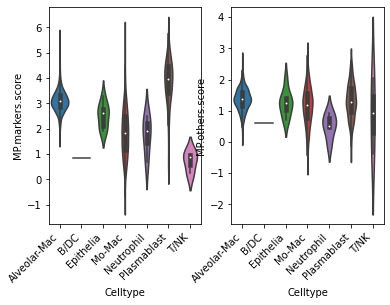

In [30]:
plt.subplot(1, 2, 1)
sns.violinplot(data=bal.obs, x='Celltype', y='MP.markers.score')
plt.xticks(rotation=45, ha='right')
plt.subplot(1, 2, 2)
sns.violinplot(data=bal.obs, x='Celltype', y='MP.others.score')
plt.xticks(rotation=45, ha='right')

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '2 Mono/Mp'),
  Text(1, 0, '1 FCN1-Mono'),
  Text(2, 0, '3 SPP1/LGMN-Mp'),
  Text(3, 0, 'Others (COVID)'),
  Text(4, 0, 'Low quality'),
  Text(5, 0, '4 SPP1/TREM2-Mp'),
  Text(6, 0, '6 Prolif. AMp'),
  Text(7, 0, '5 INHBA-AMp')])

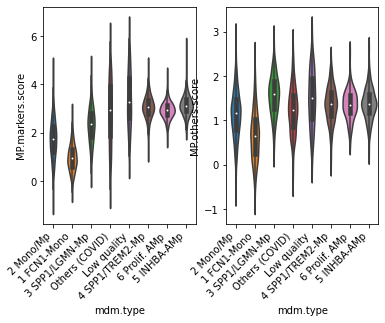

In [31]:
plt.subplot(1, 2, 1)
sns.violinplot(data=bal.obs, x='mdm.type', y='MP.markers.score')
plt.xticks(rotation=45, ha='right')
plt.subplot(1, 2, 2)
sns.violinplot(data=bal.obs, x='mdm.type', y='MP.others.score')
plt.xticks(rotation=45, ha='right')

In [32]:
ad.obs['disease.status'] = np.where(ad.obs['study'] == 'BAL', ad.obs['mdm.type'], ad.obs['disease.status'])
# ad.obs['disease.status'] = np.where(ad.obs['disease.status'] == 'BAL', ad.obs['Celltype'], ad.obs['disease.status'])
ad.obs['disease.status'].value_counts()

control            39409
IPF                38460
COPD               30159
covid              22810
2 Mono/Mp           2951
3 SPP1/LGMN-Mp      1190
1 FCN1-Mono          992
5 INHBA-AMp          916
4 SPP1/TREM2-Mp      819
Others (COVID)       358
6 Prolif. AMp        175
Low quality          102
Name: disease.status, dtype: int64

In [33]:
disease = ad.obs['disease.status']
set(disease)

{'1 FCN1-Mono',
 '2 Mono/Mp',
 '3 SPP1/LGMN-Mp',
 '4 SPP1/TREM2-Mp',
 '5 INHBA-AMp',
 '6 Prolif. AMp',
 'COPD',
 'IPF',
 'Low quality',
 'Others (COVID)',
 'control',
 'covid'}

In [34]:
# calculate neighbors in the embedding of without budinger
ad_no_budinger = ad[ad.obs['study'] != 'budinger']
ad_no_budinger.shape
ad_no_budinger.obs.groupby('study').size()
sc.pp.neighbors(ad_no_budinger)

         Falling back to preprocessing with `sc.pp.pca` and default params.


In [35]:
# calculate neighbors in the embedding without bal
ad_no_bal = ad[ad.obs['study'] != 'BAL']
ad_no_bal.shape
ad_no_bal.obs.groupby('study').size()
# sc.pp.neighbors(ad_no_bal)

study
adams       90477
budinger    22810
morse       17551
dtype: int64

### Calculation of count scores based on distance between cells in the embeddings

- This function needs to be executed several times
- once all minus budinger, and once for all minus bal

In [36]:
def get_scores(ad):
    import numpy as np
    from itertools import combinations

    disease = ad.obs['disease.status']
    conn = ad.uns['neighbors']['connectivities']

    masks = []
    obs = []
    masks = []
    positions = np.arange(ad.shape[0]) # .reshape(w, h)
    conn_array = conn.toarray() if (type(conn) != np.ndarray) else conn

    pos_by_pair = {}

    uniq = set(disease)
    
    print(uniq)
    va = [a for a in uniq if a not in {'IPF', 'COPD', 'control'} and str(a) != 'nan']
    vb = [b for b in uniq if b in {'IPF', 'COPD', 'control'}]

    for i in va:
        for j in vb:
            print(i, j)

            x = positions[disease == i]
            y = positions[disease == j]


            xy = cartesian([x, y])
            x, y = xy[:, 0].flatten(), xy[:, 1].flatten()

            edges = conn_array[x, y]
            edges = np.asarray(edges).flatten()
            x_nodes = x[edges > 0]
            y_nodes = y[edges > 0]
            n_nodes_x, n_nodes_y = x_nodes.shape[0], y_nodes.shape[0]
            nx_uniq, ny_uniq = np.unique(x_nodes).shape[0], np.unique(y_nodes).shape[0]

            k = i + ':' + j
            if not k in pos_by_pair:
                pos_by_pair[i + ':' + j] = {}
            pos_by_pair[i + ':' + j][i] = np.unique(x_nodes)
            pos_by_pair[i + ':' + j][j] = np.unique(y_nodes)

            obs.append([i, j, nx_uniq, ny_uniq, nx_uniq + ny_uniq])

    scores = []
    for mi, mdm_name in enumerate(va):
        x = positions[disease == mdm_name]
        print(mi, len(va), mdm_name)

        idx_by_pos = {pos: idx for pos, idx in zip(list(positions[disease == mdm_name]),
                                               list(disease[disease == mdm_name].index))}

        for xi, pi in enumerate(x):
            if xi % 250 == 0:
                print(xi, len(x))

            sel = conn_array[pi,:]

            mask = (sel > 0) & (ad.obs['study'].isin({'morse', 'adams'}))
            sel_df = ad[mask,:].obs[['study', 'disease.status']]
            sel_df['edge.score'] = sel[mask] 
            sel_df['cell.x'] = pi
            sel_df['cell.x.type'] = mdm_name
            sel_df['cell.y'] = sel_df.index
            sel_df['cell.x.id'] = idx_by_pos[pi]

            # print(pi, sel_df.shape[0])
            scores.append(sel_df.reset_index(drop=True))

    import pandas as pd
    scores = pd.concat(scores)
    scores

    from os.path import exists

    print('here...')
    
    return scores

In [37]:
import pandas
from os.path import exists

In [38]:
budinger = get_budinger()

budinger
True ../data/budinger/budinger_input_scvi_scanpy_norm.h5ad
scoring MP.markers 20
scoring MP.others 10
scoring MP.all 31


### Because we forgot to include mdm.type to the integrated object, we do this after integration

In [39]:
mdm_type_by_bc = budinger.obs.set_index('Unnamed: 0')['Cell Type'].to_dict()


ad_no_bal.obs['mdm.type'] = np.where(ad_no_bal.obs['study'] == 'budinger', ad_no_bal.obs['Unnamed: 0'].map(mdm_type_by_bc), ad_no_bal.obs['mdm.type'])
ad_no_bal.obs['disease.status'] = np.where((ad_no_bal.obs['study'] == 'budinger'), ad_no_bal.obs['mdm.type'], ad_no_bal.obs['disease.status'])


Trying to set attribute `.obs` of view, copying.


In [40]:
ad_no_bal.obs['Cluster']

SC154IPFUP_AAACCTGCATCACGAT-1-0-0-0-0-0-0    nan
SC154IPFUP_AAACGGGGTACCGGCT-1-0-0-0-0-0-0    nan
SC154IPFUP_AAACGGGTCTGTCCGT-1-0-0-0-0-0-0    nan
SC154IPFUP_AAAGATGAGATCCCGC-1-0-0-0-0-0-0    nan
SC154IPFUP_AAAGATGAGATGCGAC-1-0-0-0-0-0-0    nan
                                            ... 
484C_TTGACTTTCATCTGCC-1-0-0-1                nan
484C_TTTACTGCAAATTGCC-1-0-0-1                nan
484C_TTTATGCCAATAGAGT-1-0-0-1                nan
484C_TTTATGCTCGATAGAA-1-0-0-1                nan
484C_TTTGGTTCATCGGGTC-1-0-0-1                nan
Name: Cluster, Length: 130838, dtype: category
Categories (7, object): ['AM1', 'AM2', 'MoM1', 'MoM2', 'MoM3', 'Monocytes', 'nan']

In [41]:
ad_no_bal.obs['mdm.type'].value_counts()

Others (A/M/B)    108028
MoAM-1              8188
MoAM-2              7665
MoAM-3              5037
TRAM-2               842
TRAM-1               822
MoAM-4               129
TRAM-3               127
Name: mdm.type, dtype: int64

In [42]:
ad_no_bal.obs['mdm.type'] = np.where(ad_no_bal.obs['study'] == 'budinger', ad_no_bal.obs['Cluster'],  ad_no_bal.obs['mdm.type'])
ad_no_bal.obs['disease.status'] = np.where((ad_no_bal.obs['study'] == 'budinger'), ad_no_bal.obs['mdm.type'], ad_no_bal.obs['disease.status'])

In [43]:
ad_no_bal.obs['disease.status'].value_counts()

control      39409
IPF          38460
COPD         30159
MoM2         10453
MoM3          8845
Monocytes     1968
AM1           1030
AM2            290
MoM1           224
Name: disease.status, dtype: int64

In [44]:
idx = list(ad_no_bal.obs.copy().index)
np.random.shuffle(idx)
idx = idx[:1000]
ad_no_bal_sample = ad_no_bal[ad_no_bal.obs.index.isin(set(idx)),:]
ad_no_bal_sample.obs['disease.status'].value_counts()

control      309
IPF          280
COPD         233
MoM2          78
MoM3          72
Monocytes     19
AM1            6
AM2            3
Name: disease.status, dtype: int64

In [45]:
ad_no_bal_sample.obs['disease.status'].value_counts()

control      309
IPF          280
COPD         233
MoM2          78
MoM3          72
Monocytes     19
AM1            6
AM2            3
Name: disease.status, dtype: int64

In [46]:
ad_no_bal.obs['disease.status'].value_counts()

control      39409
IPF          38460
COPD         30159
MoM2         10453
MoM3          8845
Monocytes     1968
AM1           1030
AM2            290
MoM1           224
Name: disease.status, dtype: int64

In [47]:
import pandas as pd
from os.path import exists

In [49]:
scores_by_k = {}
for k, next_ad in zip(['all_minus_budinger', 'all_minus_bal_sample', 'all_minus_bal'],
                      [ad_no_budinger, ad_no_bal_sample, ad_no_bal]):
    print(k, next_ad.shape)
    
    p = '../data/conn_scores_by_bal_cell_revision_120k_%s.tsv.gz' % k
    print(exists(p), p)
    if not exists(p): # 'all_minus_bal' in k:
        print('calculating scores...', k)
        print(exists(p), p)
        scores = get_scores(next_ad)
        scores.to_csv(p, sep='\t', compression='gzip', index=None)
        
    if not k in scores_by_k:
        print('loading...')
        scores_by_k[k] = pd.read_csv(p, sep='\t', compression='gzip')
        
    

all_minus_budinger (115531, 17656)
True ../data/conn_scores_by_bal_cell_revision_120k_all_minus_budinger.tsv.gz
loading...
all_minus_bal_sample (1000, 17656)
True ../data/conn_scores_by_bal_cell_revision_120k_all_minus_bal_sample.tsv.gz
loading...
all_minus_bal (130838, 17656)
True ../data/conn_scores_by_bal_cell_revision_120k_all_minus_bal.tsv.gz
loading...


In [50]:
scores_by_k.keys() # ['cell.x.type'].value_counts()

dict_keys(['all_minus_budinger', 'all_minus_bal_sample', 'all_minus_bal'])

In [51]:
scores_by_k['all_minus_budinger']['cell.x.type'].value_counts()

2 Mono/Mp          18292
5 INHBA-AMp        10636
4 SPP1/TREM2-Mp     8109
3 SPP1/LGMN-Mp      7060
1 FCN1-Mono         3761
Others (COVID)      3043
6 Prolif. AMp       1591
Low quality          969
Name: cell.x.type, dtype: int64

In [52]:
scores_by_k.keys()

dict_keys(['all_minus_budinger', 'all_minus_bal_sample', 'all_minus_bal'])

### Given a subset visualization attempt to plot the data

In [53]:
for k in scores_by_k:
    print(k, scores_by_k[k].shape)

all_minus_budinger (53461, 7)
all_minus_bal_sample (17, 7)
all_minus_bal (195656, 7)


In [54]:
scores_by_k['all_minus_bal']

,study,disease.status,edge.score,cell.x,cell.x.type,cell.y,cell.x.id
0,morse,IPF,0.232685,17551,MoM2,SC154IPFUP_ATCTGCCTCACCGGGT-1-0-0-0-0-0-0,63860-1-0-0-0
1,adams,IPF,0.180219,17551,MoM2,210CO_GGGTTGCTCTGCCAGG-1-0-0-1-0,63860-1-0-0-0
2,adams,control,0.293829,17551,MoM2,092C_TCGAGGCTCGCTTAGA-1-0-0-1,63860-1-0-0-0
3,adams,control,0.121700,17551,MoM2,160C_ATCCACCAGAATGTTG-1-0-0-1,63860-1-0-0-0
4,adams,control,0.255294,17551,MoM2,160C_ATTATCCTCTACTATC-1-0-0-1,63860-1-0-0-0
...,...,...,...,...,...,...,...
195651,adams,COPD,0.148102,40328,AM2,192CO-b_CGGAGTCCACCACGTG-1-0-0-1-0-0,148250-1-0-0-0
195652,adams,IPF,0.198943,40328,AM2,177I_AGATCTGCCGATCTAG-1-0-0-1-0,148250-1-0-0-0
195653,adams,IPF,0.145802,40328,AM2,177I_AGGGTGATCGCACTCT-1-0-0-1-0,148250-1-0-0-0
195654,adams,control,0.493166,40328,AM2,003C_CAACCAAAGAGCCTAG-1-0-0-1,148250-1-0-0-0


In [55]:
scores_by_k.keys()

dict_keys(['all_minus_budinger', 'all_minus_bal_sample', 'all_minus_bal'])

In [56]:
# hm4.reindex(hm4.max(axis=1).sort_values(ascending=False).index)

In [57]:
scores_by_k.keys()

dict_keys(['all_minus_budinger', 'all_minus_bal_sample', 'all_minus_bal'])

In [58]:
order_by_k = {'all_minus_bal': ['MoM1', 'MoM3', 'AM2', 'Monocytes', 'AM1', 'MoM2'],
              'all_minus_budinger': ['6 Prolif. AMp', '2 Mono/Mp', '3 SPP1/LGMN-Mp', '4 SPP1/TREM2-Mp', '1 FCN1-Mono', '5 INHBA-AMp'],
              'all_minus_budinger_updated_ann': ['CD163/LGMN-Mφ', 'Prolif. AMφ', 'Mono/Mφ', 'AMφ-1', 'Monocytes', 'AMφ-2']}

In [61]:
# to plot the circlesheatmap we need a custom library
from CirclesHeatmap import CirclesHeatmap

In [62]:
print('here')

here


In [64]:
## a new annotations has been proposed and has to be incorporated into the objects
mapping_revision_2021 = pd.read_csv('../data/barcodes_cluster_annotation_OD.csv', index_col=0)
assert sum(ad.obs.index == mapping_revision_2021.index) == ad.shape[0]
ad_no_budinger.obs['bal_clusters'] = ad_no_budinger.obs.index.map(mapping_revision_2021['bal_clusters'].to_dict())


/home/icb/ignacio.ibarra/miniconda3/envs/covid_macrophages_integration/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3417: DtypeWarning: Columns (1,2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [65]:
ad_no_budinger.obs['bal_clusters'] = ad_no_budinger.obs.index.map(mapping_revision_2021['bal_clusters'].to_dict())
ad_no_budinger.obs['bal_clusters'].value_counts()

other            108028
Monocytes          2012
CD163/LGMN-Mφ      1723
Mono/Mφ            1555
AMφ-1               998
AMφ-2               713
low quality         310
Prolif. AMφ         192
Name: bal_clusters, dtype: int64

In [66]:
ad_no_budinger[ad_no_budinger.obs.index == 'ACTTCGCAGCATGCAG-2-1-0-0-0-0',:].obs

,GSM,sample.id,n_counts,log_counts,n_genes,mt_frac,patient.id,cell.type,study,disease.status,...,COVID-19,Tissue Type,Cell Population,Cell Type,leiden,No of UMIs,No of genes,% of mito genes,Cluster,bal_clusters
ACTTCGCAGCATGCAG-2-1-0-0-0-0,nan,nan,34548.0,NaN,NaN,NaN,C19-62,Macrophages,BAL,4 SPP1/TREM2-Mp,...,nan,nan,nan,nan,NaN,NaN,NaN,NaN,nan,AMφ-1


In [67]:
scores = scores_by_k['all_minus_budinger'].copy()
scores['cell.x.type'] = scores['cell.x.id'].map(mapping_revision_2021['bal_clusters'].to_dict())
scores_by_k['all_minus_budinger_updated_ann'] = scores

In [68]:
set(scores_by_k['all_minus_budinger_updated_ann']['cell.x.type'])

{'AMφ-1',
 'AMφ-2',
 'CD163/LGMN-Mφ',
 'Mono/Mφ',
 'Monocytes',
 'Prolif. AMφ',
 'low quality'}

In [69]:
scores_by_k.keys()

dict_keys(['all_minus_budinger', 'all_minus_bal_sample', 'all_minus_bal', 'all_minus_budinger_updated_ann'])

In [70]:
print('here...')

here...


In [ ]:
for k in scores_by_k:
    if not 'all_minus_budinger_updated_ann' in k:
        continue
    if 'sample' in k:
        continue
    print(k)
    # if not 'all_minus_budinger' in k:
    #     continue
    # if k != 'all_minus_budinger':
    #     continue
    
    scores = scores_by_k[k]
    
    cell_id_by_index = scores.set_index('cell.x')['cell.x.id'].to_dict()
    
    print('calculating scores per position...')
    
    hm = []
    for cell_id, grp in scores.groupby('cell.x'):
        # print(cell_id, grp.shape)
        sel = pd.DataFrame(grp['disease.status'].value_counts()).reset_index()
        sel['cell.id'] = cell_id
        hm.append(sel)
    hm = pd.concat(hm)


    print('establishing pivot steps...')
    hm2 = hm.pivot('cell.id', 'index', 'disease.status').fillna(0)
    hm2['proximity.mapping.label'] = hm2.idxmax(axis=1)
    hm2['mdm.type'] = hm2.index.map(scores.set_index('cell.x')['cell.x.type'].to_dict())
    hm_df = pd.DataFrame(hm2.groupby(['mdm.type', 'proximity.mapping.label']).size()).reset_index()
    hm3 = hm_df.pivot('mdm.type', 'proximity.mapping.label', 0)

    hm2['cell.id'] = hm2.index.map(cell_id_by_index)
    len(set(hm2['cell.id']))

    from os.path import join
    import matplotlib
    import matplotlib.pyplot as plt

#     print('setting up plotting parameters...')
#     fpath = join(plt.rcParams["datapath"], "fonts/ttf/arial.ttf")
#     from matplotlib import font_manager as fm, rcParams
#     prop = fm.FontProperties(fname=fpath)
#     rcParams["font.family"] = "arial"

    hm_df = hm_df[~hm_df['mdm.type'].isin({'Undefined', 'Low quality', 'Others (COVID)'})]

    # for visualization purposes we'll remove COPD from our visualization layouts...
    hm_df = hm_df[hm_df['proximity.mapping.label'] != 'COPD']
    sum(hm_df[0])


    from scipy.stats import fisher_exact 
    from lib.RFacade import RFacade


    print('calculating enrichments.......')
    res = []
    for mdm_type in set(hm_df['mdm.type']):
        print(mdm_type)
        
        # we 
        for prox_map_lab in set(hm_df['proximity.mapping.label']):
            a = sum(hm_df[(hm_df['mdm.type'] == mdm_type) & (hm_df['proximity.mapping.label'] == prox_map_lab)][0])
            b = sum(hm_df[(hm_df['mdm.type'] == mdm_type) & (hm_df['proximity.mapping.label'] != prox_map_lab)][0])
            c = sum(hm_df[(hm_df['mdm.type'] != mdm_type) & (hm_df['proximity.mapping.label'] == prox_map_lab)][0])
            d = sum(hm_df[(hm_df['mdm.type'] != mdm_type) & (hm_df['proximity.mapping.label'] != prox_map_lab)][0])
            t = [mdm_type, prox_map_lab, a, b, c, d] + list(fisher_exact([[a, b], [c, d]], alternative='greater'))
            res.append(t)
    res = pd.DataFrame(res, columns=['mdm.type', 'prox.map.lab', 'a', 'b', 'c', 'd', 'odds.ratio', 'p.val'])
    res['p.adj'] = RFacade.get_bh_pvalues(res['p.val'])
    res['asterisk'] = RFacade.get_pval_asterisks(res['p.adj'])
    res[res['p.adj'] < 0.1].sort_values('p.adj')

    hm3 = hm_df.pivot('mdm.type', 'proximity.mapping.label', 0)[['IPF', 'control']] # 'COPD']]
    hm3_sig = res.pivot('mdm.type', 'prox.map.lab', 'asterisk')[['IPF', 'control']]#  'COPD']]
    hm3_padj = res.pivot('mdm.type', 'prox.map.lab', 'p.adj')[['IPF', 'control']]#  'COPD']]

    import matplotlib
    matplotlib.rcParams['pdf.fonttype'] = 42
    matplotlib.rcParams['ps.fonttype'] = 42
    matplotlib.rcParams['ps.fonttype'] = 42

    import importlib
    print('# of cells in the treatment')
    print(hm3.sum().sum())
    
    print('plotting...')
    hm4 = hm3.copy()
    for c in hm4:
        hm4[c] = hm4[c] / hm3.sum(axis=1)
    hm4

    hm4 = hm4.reindex(hm4.max(axis=1).sort_values(ascending=False).index)

    new_idx = order_by_k[k]
    print(new_idx)
    print(hm4.index)
    hm4 = hm4.reindex(new_idx)
    print(hm4.index)
    
    
    hm3_sig = hm3_sig.reindex(hm4.index)
    hm3_padj = hm3_padj.reindex(hm3_sig.index)
    
    annot = (hm4).astype(str) + np.where(hm3_sig.astype(str) != '', '*', '')
    for c in annot:
        annot[c] = annot[c].astype(str).str[:4] + np.where(annot[c].astype(str).str.contains('\*'), '*', '')
    annot


    import seaborn as sns
    cg = sns.clustermap(hm4, annot=annot,
                        fmt='', cmap='Reds', row_cluster=False, col_cluster=False)
    # plt.yticks(rotation=0)
    plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
    plt.subplots_adjust(bottom=.7, right=.3)

    
    cg.fig.suptitle('# of cells %i' % hm3.sum().sum())
    plt.savefig('../data/figures/majority_label_heatmap_with_fisher_exact_test_padj_revision_%s.pdf' % k)
    plt.close()
    
    rcParams['figure.dpi'] = 90
    line_widths = pd.DataFrame(np.where(hm3_sig != '', 2.0, .3), index=hm3_sig.index, columns=hm3_sig.columns)
    
    for power in 1.0, 2.5, 3.0:
        if power != 2.5:
            continue
        CirclesHeatmap.make_bubble_heatmap(-np.log10(hm3_padj), hm4,
                                           heatmap_grid=[4, 6, 0, 2, 2, 1],
                                           quantAmplifier=40,
                                           colorbar_grid=[2, 5, 0, 4, 2, 1],
                                           cbar_label='-log10(adjusted P)', ha='right',
                                           circles_legend_title='Fractoin of cells [rows]', h=10, w=12,
                                           tickscolorbar=[0, 25 / (2 if 'budinger' in k else 1), 50 / (2 if 'budinger' in k else 1)],
                                           power=power, line_widths=line_widths,
                                           circle_legend_ticks=[0, 0.25, .5, .75, 1.0], palette_id='Reds', vmin=0, vmax=25 if 'budinger'in k else 50,
                                           heatmap_title=k)
        pdf_path = '../data/figures/majority_label_heatmap_with_fisher_exact_test_padj_revision_%s_dotplot_%.1f.pdf' % (k, power)
        import os
        plt.savefig(pdf_path)
        plt.close()
        print(abspath(pdf_path))
    
    # save raw data (for oliver)
    -np.log10(hm3_padj)
    
    # break
    
    # assert False

In [ ]:
-np.log10(hm3_padj)

In [ ]:
hm3_padj

In [ ]:
CirclesHeatmap.make_bubble_heatmap?

In [ ]:
hm4

In [ ]:
print(abspath('../data/figures/'))

### At this step: the last dataset in the for loop has to be **all_minus_budinger**.
#### otherwise the heatmaps below are not properly updated.

In [ ]:
hm3

In [ ]:
hm4

In [ ]:
scores['cell.x.type'].value_counts()

In [ ]:
hm3_sig

In [ ]:
hm3

In [ ]:
hm4

In [ ]:
abspath('../data/figures/majority_label_heatmap_with_fisher_exact_test_padj_revision.pdf')

In [ ]:
plt.hist(scores['edge.score'])

In [ ]:
# df = pd.DataFrame(obs, columns=['a', 'b', 'n.a', 'n.b', 'n.total'])
# df.sort_values('n.total', ascending=False)

In [ ]:
ad.shape

In [ ]:
# pos_by_pair.keys()

In [ ]:
def get_assoc_cell_by_mdm_type(mdm_type):
    ref = mdm_type
    print('running...')
    final = None
    keys_by_group = {}
    for k2 in ['COPD', 'IPF', 'control']:
        # print(ref, k2)
        k = ref + ':' + k2
        if not k in pos_by_pair:
            k = k2 + ':' + ref
        if not k in pos_by_pair:
            continue

        a = ad[pos_by_pair[k][ref],:]
        a.obs['selection'] = k
        keys_by_group[k] = set(a.obs.index)
        final = a if final is None else final.concatenate(a)

    filter_uniq = True
    if filter_uniq:
        uniq_by_k = {}
        for k in keys_by_group:
            uniq = set(keys_by_group[k])
            # print(k, len(keys_by_group[k]))
            for k2 in keys_by_group:
                if k == k2:
                    continue
                # print('removing if overlapping with %s' % k2, len(keys_by_group[k2]))
                uniq -= keys_by_group[k2]
            # print('uniq', len(uniq))
            uniq_by_k[k] = uniq
            # print('')
        for k in uniq_by_k:
            continue
            print(k, len(uniq_by_k[k]))

    # print('running...')
    final = None
    for k2 in ['COPD', 'IPF', 'control']:
        # print(ref, k2)
        k = ref + ':' + k2
        if not k in pos_by_pair:
            k = k2 + ':' + ref
        if not k in pos_by_pair:
            continue

        a = ad[pos_by_pair[k][ref],:]
        a.obs['selection'] = k

        if filter_uniq:
            a = a[(a.obs['selection'] == k) & (a.obs.index.isin(set(uniq_by_k[k]))),:]
        else:
            a = a[(a.obs['selection'] == k),:]
        # print(k, a.shape)
        final = a if final is None else final.concatenate(a)

    final.obs['closest.disease.status'] = final.obs['selection'].str.split(':').str[1]
    return final

In [ ]:
k

In [ ]:
final = ad_no_bal if k == 'ad_minus_bal' else ad_no_budinger if (k == 'all_minus_budinger' or k == 'all_minus_budinger_updated_ann') else None
print(final.shape)
assert final is not None
final = final.copy()

In [ ]:
# hm2.head()
final = final[final.obs.index.isin(set(hm2['cell.id'])),:]
final.obs['closest.disease.status'] = final.obs.index.map(hm2.set_index('cell.id')['proximity.mapping.label'].to_dict())
final.shape

In [ ]:
# final.obs['selection'].value_counts()

In [ ]:
# hm2[hm2['cell.id'] == '483C_CGCTTCACATTCACTT-1-0']

In [ ]:
for c in set(bal.obs['Celltype']):
    sel = bal.obs[bal.obs['Celltype'] == c]
    print(c, sel.shape[0], sel[pd.isnull(sel['mdm.type'])].shape[0])

In [ ]:
final.obs.index.map(mapping_revision_2021['bal_clusters'].to_dict())

In [ ]:
final.obs['mdm.type'] = final.obs.index.map(mapping_revision_2021['bal_clusters'].to_dict())


In [ ]:
final.obs['mdm.type'].value_counts()

In [ ]:
hm2['cell.id']

In [ ]:
final.obs.groupby(['mdm.type', 'closest.disease.status']).size().reset_index()

In [ ]:
final.obs.groupby(['mdm.type', 'closest.disease.status']).size().reset_index().pivot('mdm.type', 'closest.disease.status', 0)[['IPF', 'control']]

In [ ]:
rcParams['figure.figsize'] = [10, 5]
sns.violinplot(data=final.obs, x='mdm.type', y='MP.all.score', hue='closest.disease.status', hue_order=['IPF', 'control'])
plt.xticks(rotation=45, ha='right')

plt.savefig('../data/figures/closest_disease_status_gene_scores_bal.pdf')
plt.close()

In [ ]:
from matplotlib import rcParams
from lib.RFacade import RFacade
rcParams['figure.figsize'] = [10, 15]

mdm_types = set(final.obs['mdm.type'])
nrows = len(mdm_types)
print(nrows)

all_dotplot = []

# final = get_assoc_cell_by_mdm_type(mdm_type)
res_by_mdm_type = []
for ri, mdm_type in enumerate(mdm_types):
    print(mdm_type)
    
    final_sel = final[final.obs['mdm.type'] == mdm_type,:]
        
    for pi, marker_genes_lab in enumerate(['markers', 'others', 'all']):
        ax = plt.subplot2grid([len(mdm_types), 3], [ri, pi])

        ylab = 'MP.%s.score' % marker_genes_lab

        xorder = ['IPF', 'COPD', 'control']
        sns.violinplot(data=final_sel.obs, x='closest.disease.status',
                       y=ylab, order=xorder)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        plt.xticks(rotation=45, ha='right')
        plt.title(mdm_type)


        # Calculate number of obs per group & median to position labels
        val_by_xi = {}
        nobs_by_xi = {}
        for xi in xorder:
            val = final_sel.obs[final_sel.obs['closest.disease.status'] == xi]
            val_by_xi[xi] = max(val[ylab]) if len(val[ylab]) != 0 else 0
            nobs_by_xi[xi] = val[ylab].shape[0]

        # Add it to the plot
        pos = range(len(nobs_by_xi))
        for tick, label, xi in zip(pos, ax.get_xticklabels(), xorder):
           ax.text(pos[tick], val_by_xi[xi] + 0.5, nobs_by_xi[xi], horizontalalignment='center',
                   size='x-small', color='black', weight='semibold', fontsize=8)
        
    df = []
    for gene_group in ['MP.markers.score', 'MP.others.score', 'MP.all.score']:
        for a, b in combinations(set(['IPF', 'COPD', 'control']), r=2):
            x = np.array(final_sel.obs[final_sel.obs['closest.disease.status'] == a][gene_group])
            y = np.array(final_sel.obs[final_sel.obs['closest.disease.status'] == b][gene_group])
            pval = RFacade.get_wilcox_test_pval(x, y, alternative='two.sided')
            df.append([gene_group, a, np.median(x), len(x), b, np.median(y), len(y), pval])
    df = pd.DataFrame(df, columns=['gene.group', 'a', 'median.a', 'n.a', 'b', 'median.b', 'n.b', 'p.val'])
    df['p.adj'] = RFacade.get_bh_pvalues(df['p.val'])
    df.sort_values('p.adj')
    df['mdm.type'] = mdm_type
    res_by_mdm_type.append(df)

    all_dotplot.append(final_sel)
     
df = pd.concat(res_by_mdm_type)
plt.tight_layout()
# plt.subplots_adjust(bottom=.5)
save = True
if save:
    plt.savefig('../data/figures/scores_only_uniquely_assigned_ad_no_bal.pdf')
    plt.close()


### Check whether normalized expression values are so different between BAL/Adams/Morse

In [ ]:
abspath('../data/figures/scores_only_uniquely_assigned.pdf')

In [ ]:
sel_obs = ad[:,ad.var.index == 'TREM2'].obs[['study', 'disease.status']]
sel_expr = ad[:,ad.var.index == 'TREM2'].to_df()

In [ ]:
sel_expr = pd.concat([sel_expr, sel_obs], axis=1)

In [ ]:
sel_expr

In [ ]:
bal = sc.read_h5ad('data/bal/bal.h5ad')

In [ ]:
bal.to_df().describe()

In [ ]:
df['sig'] = df['p.adj'] < 0.1
df.sort_values('p.adj').to_csv('../data/test_inferred_disease_status_comparisons_by_mdm_%s.tsv' % k, index=None, sep='\t')


In [ ]:
# 'data/test_inferred_disease_status_comparisons_by_mdm_%s.tsv' % k

In [ ]:
ll data/test_inferred_disease_status_comparisons_by_mdm_*

In [ ]:
df1 = pd.read_csv('../data/test_inferred_disease_status_comparisons_by_mdm_all_minus_budinger.tsv', sep='\t')
df2 = pd.read_csv('../data/test_inferred_disease_status_comparisons_by_mdm_all_minus_bal.tsv', sep='\t')
df3 = pd.read_csv('../data/test_inferred_disease_status_comparisons_by_mdm_all_minus_budinger_updated_ann.tsv', sep='\t')
df1['lab'] = 'Present Study'
df2['lab'] = 'Bharat'
df3['lab'] = 'Present Study - revision'

df = pd.concat([df1, df2, df3])
df[(df['gene.group'] == 'MP.all.score') & (df['a'] != 'COPD') &
   (df['b'] != 'COPD')].sort_values('p.adj').to_csv('../data/test_inferred_disease_status_comparisons_supp.tsv', sep='\t') # [['mdm.type', 'a', 'b', 'median.a', 'median.b', 'p.adj']]

In [ ]:
df[(df['gene.group'] == 'MP.all.score') & (df['a'] != 'COPD') &  (df['b'] != 'COPD') & (df['lab'] == 'Present Study - revision')].sort_values('p.adj') # [['mdm.type', 'a', 'b', 'median.a', 'median.b', 'p.adj']]

In [ ]:
df[(df['gene.group'] == 'MP.all.score') & (df['p.adj'] < 0.5) & (df['a'] != 'COPD') &  (df['b'] != 'COPD')].sort_values('p.adj') # [['mdm.type', 'a', 'b', 'median.a', 'median.b', 'p.adj']]

In [ ]:
# final = anndata.concat(all_dotplot)

In [ ]:
counts_df = pd.DataFrame(final.obs['selection'].value_counts())
counts_df = counts_df.reset_index()
counts_df.columns = ['mdm.type', 'n']
counts_df['closest.condition'] = counts_df['mdm.type'].str.split(":").str[1]
counts_df['mdm.type'] = counts_df['mdm.type'].str.split(":").str[0]
counts_df.sort_values('mdm.type')
hm = counts_df.pivot('mdm.type', 'closest.condition', 'n').transpose().fillna(0).astype(int)
counts_df.to_csv('data/counts_by_closest_condition.tsv', sep='\t', index=None)
sns.clustermap(hm, cmap='Reds', annot=hm, fmt='')
plt.subplots_adjust(bottom=.7)

# plt.savefig('data/figures/heatmap_counts_per_condition.pdf')
# plt.close()


In [ ]:
final.write('../data/bal_cells_uniquely_mapped.h5ad', compression='lzf')

In [ ]:
final = anndata.read('../data/bal_cells_uniquely_mapped.h5ad', compression='lzf')

In [ ]:
final.shape

In [ ]:
final.obs['closest.disease.status'].value_counts()

In [ ]:
# sorted(final_undefined_removed.obs.columns)

In [ ]:
rcParams['figure.figsize'] = [4, 2.5]

final_undefined_removed = final[final.obs['mdm.type'] != 'Low quality',:]

print(final_undefined_removed.obs['mdm.type'].value_counts())
sns.violinplot(data=final_undefined_removed.obs, x='mdm.type', y='MP.markers.score', hue='closest.disease.status', hue_order=['IPF', 'control'],
           order=final_undefined_removed.obs.groupby('mdm.type')['MP.markers.score'].median().sort_values().index, linewidth=0.7, width=1.0)
plt.subplots_adjust()
plt.xticks(rotation=90, ha='center')
plt.savefig('../data/figures/closest_disease_status_gene_scores_mdm.pdf')
plt.close()

In [ ]:
final_undefined_removed.obs['closest.disease.status'].value_counts()

In [ ]:
print('here...')

In [ ]:
scanpy.pl.stacked_violin(adata, var_names, groupby, 

# DE genes

In [ ]:
#Set number of threads
TF_CONFIG_PROTO.inter_op_parallelism_threads = 1
TF_CONFIG_PROTO.intra_op_parallelism_threads = 12

In [ ]:
final.var_names

In [ ]:
from utils import *
marker_genes = get_marker_genes_ipf()

In [ ]:
sel = final[:,final.var.index.isin(marker_genes['MP.all'])]
sel

In [ ]:
print('here...')

In [ ]:
sc.tl.rank_genes_groups(final, groupby='selection')

In [ ]:
sc.pl.rank_genes_groups_dotplot(final, groupby='selection')

In [ ]:
final.uns['groupby']

In [ ]:
pd.DataFrame(final.obs['selection'].value_counts())

In [ ]:
final_test = final[final.obs['selection'] != 'Mo-Mac:COPD',:]
pd.DataFrame(final_test.obs['selection'].value_counts())

In [ ]:

test = de.test.wald(
    data=final_test.layers['counts'],
    formula_loc="~ 1 + selection",
    factor_loc_totest="selection",
    gene_names=final_test.var_names,
    sample_description=final_test.obs)

In [ ]:
#view first 10 results
df = test.summary() # .iloc[:10,:]
df['padj'] = RFacade.get_bh_pvalues(df['pval'])
df[df['padj'] < 1e-5].shape
df[df['is.reference.marker']].sort_values('padj')

In [ ]:
df['padj'] = RFacade.get_bh_pvalues(df['pval'])

In [ ]:
df['is.reference.marker'] = df['gene'].isin(marker_genes['MP.all'])
df[df['is.reference.marker']].sort_values('padj')

In [ ]:
test.plot_volcano(corrected_pval=True, min_fc=1.05, alpha=10e-5, size=20)

In [ ]:
from utils import *
marker_genes = get_marker_genes_ipf()

In [ ]:
marker_genes['MP.markers'] = {g for g in marker_genes['MP.markers'] if g in set(bal.var.index)}

In [ ]:
bal.to_df().head()

In [ ]:

bal.obs['Celltype'].value_counts()
sc.pl.dotplot(bal, var_names=list(marker_genes['MP.markers']), groupby='Celltype', use_raw=None)
sc.pl.dotplot(bal, var_names=list(marker_genes['MP.markers']), groupby='Celltype_2', use_raw=None)